In [ ]:
#@title Install

!pip install -U lingtrain-aligner==0.4.3
!pip install razdel dateparser sentence_transformers

In [ ]:
import os

from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper

In [ ]:
link_gr = !wget https://raw.githubusercontent.com/Drozhzhinastya/GSPC/main/experiments/lingtrain/gr_pent_deut_diak_1_1_vesp.txt
link_csl = !wget https://raw.githubusercontent.com/Drozhzhinastya/GSPC/main/experiments/lingtrain/csl_pent_1_1_vech_no_symb.txt

In [ ]:
!ls

csl_pent_1_1_vech_no_symb.txt	result
gr_pent_deut_diak_1_1_vesp.txt	sample_data


In [ ]:
#GR - file reading

path_to_file = 'gr_pent_deut_diak_1_1_vesp.txt'
with open(path_to_file, 'r') as open_file: 
    text1 = open_file.read() # считаем файл в строку

text1 = text1.split("\n")
print("Первые 10 строк:")
for x in text1[:10]:
  print(x)

Первые 10 строк:
ΠΕΝΤΗΚΟΣΤΑΡΙΟΝ%%%%%title.
Τῌ ΔΕΥΤΕΡᾼ ΤΗΣ ΔΙΑΚΑΙΝΗΣΙΜΟΥ%%%%%h1.
ΕΝ Τῼ ΕΣΠΕΡΙΝῼ%%%%%h2.
Στιχηρὰ Ἀναστάσιμα τῆς Ὀκτωήχου.
Ἦχος β΄.
Τὸν πρὸ αἰώνων ἐκ Πατρὸς γεννηθέντα, τὸν Θεὸν λόγον σαρκωθέντα, ἐκ Παρθένου Μαρίας, δεῦτε προσκυνήσωμεν· Σταυρὸν γὰρ ὑπομείνας, τῇ ταφῇ παρεδόθη, ὡς αὐτός ἠθέλησε, καὶ ἀναστὰς ἐκ νεκρῶν, ἔσωσέ με τὸν πλανώμενον ἄνθρωπον.
Ἦχος β΄.
Χριστὸς ὁ Σωτὴρ ἡμῶν, τὸ καθ' ἡμῶν χειρόγραφον προσηλώσας, τῷ Σταυρῷ ἐξήλειψε, καὶ τοῦ θανάτου τὸ κράτος κατήργησε, προσκυνοῦμεν αὐτοῦ τὴν τριήμερον Ἔγερσιν.
Ἦχος β΄.
Σὺν Ἀρχαγγέλοις ὑμνήσωμεν, Χριστοῦ τὴν Ἀνάστασιν· αὐτὸς γὰρ Λυτρωτὴς ἐστι, καὶ Σωτὴρ τῶν ψυχῶν ἡμῶν, καὶ ἐν δόξῃ φοβερᾷ καὶ κραταιᾷ δυνάμει, πάλιν ἔρχεται, κρῖναι κόσμον ὃν ἔπλασεν.


In [ ]:
#CSL - file reading

path_to_file = 'csl_pent_1_1_vech_no_symb.txt'
with open(path_to_file, 'r') as open_file: 
    text2 = open_file.read() # считаем файл в строку

text2 = text2.split("\n")
print("Первые 10 строк:")
for x in text2[:10]:
  print(x)

Первые 10 строк:
Службы Светлой седмицы%%%%%h1.
Неделя Пасхи.
Последование вечерни%%%%%h2.
По 9-м часе́, во свети́льничном, облачи́тся настоя́тель во всю́ свяще́нную оде́жду. И ста́в пред свято́ю трапе́зою с кади́льницею, зна́менует крестови́дно, и возглаша́ет глаго́ля:. Благослове́н Бо́г на́ш всегда́, ны́не и при́сно, и во ве́ки веко́в. И на́м отвеща́ющым: Ами́нь. И то́й начина́ет: Христо́с воскре́се из ме́ртвых, сме́ртию сме́рть попра́в, и су́щым во гробе́х живо́т дарова́в. три́жды. И мы́ то́йжде отвеща́ем три́жды. И глаго́лет настоя́тель преждерече́нныя стихи́: 1-й, Да воскре́снет Бо́г: 2-й: Я́ко исчеза́ет ды́м: 3-й: Та́ко да поги́бнут гре́шницы: 4-й: Се́й де́нь, его́же сотвори́ Госпо́дь: Мы́ же на ки́йждо сти́х пое́м: Христо́с воскре́се: по еди́ножды, Сла́ва: Мы́ же: Христо́с воскре́се: И ны́не: Мы́ же: Христо́с воскре́се: И па́ки настоя́тель: Христо́с воскре́се из ме́ртвых, сме́ртию сме́рть попра́в. И мы́ коне́ц: И су́щым во гробе́х живо́т дарова́в. Та́же ектениа́ вели́кая от диа́

In [ ]:
db_path = "full_cycle.db"

lang_from = "xx"
lang_to = "ru"

models = ["sentence_transformer_multilingual", "sentence_transformer_multilingual_labse"]
model_name = models[1]

In [ ]:
splitter.get_supported_languages()

{'ba': {'name': 'Bashkir'},
 'cz': {'name': 'Czech'},
 'de': {'name': 'German'},
 'en': {'name': 'English'},
 'es': {'name': 'Spanish'},
 'fr': {'name': 'French'},
 'hu': {'name': 'Hungarian'},
 'it': {'name': 'Italian'},
 'jp': {'name': 'Japanese'},
 'pl': {'name': 'Polish'},
 'pt': {'name': 'Portugal'},
 'ru': {'name': 'Russian'},
 'tr': {'name': 'Turkish'},
 'xx': {'name': 'Unknown'},
 'zh': {'name': 'Chinese'}}

In [ ]:
text1_prepared = preprocessor.mark_paragraphs(text1)
text2_prepared = preprocessor.mark_paragraphs(text2)

In [ ]:
for x in text1_prepared:
  print (x)

print("-------------------")

for x in text2_prepared:
  print (x)

ΠΕΝΤΗΚΟΣΤΑΡΙΟΝ%%%%%title%%%%%.
Τῌ ΔΕΥΤΕΡᾼ ΤΗΣ ΔΙΑΚΑΙΝΗΣΙΜΟΥ%%%%%h1%%%%%.
ΕΝ Τῼ ΕΣΠΕΡΙΝῼ%%%%%h2%%%%%.
Στιχηρὰ Ἀναστάσιμα τῆς Ὀκτωήχου%%%%%.
Ἦχος β΄%%%%%.
Τὸν πρὸ αἰώνων ἐκ Πατρὸς γεννηθέντα, τὸν Θεὸν λόγον σαρκωθέντα, ἐκ Παρθένου Μαρίας, δεῦτε προσκυνήσωμεν· Σταυρὸν γὰρ ὑπομείνας, τῇ ταφῇ παρεδόθη, ὡς αὐτός ἠθέλησε, καὶ ἀναστὰς ἐκ νεκρῶν, ἔσωσέ με τὸν πλανώμενον ἄνθρωπον%%%%%.
Ἦχος β΄%%%%%.
Χριστὸς ὁ Σωτὴρ ἡμῶν, τὸ καθ' ἡμῶν χειρόγραφον προσηλώσας, τῷ Σταυρῷ ἐξήλειψε, καὶ τοῦ θανάτου τὸ κράτος κατήργησε, προσκυνοῦμεν αὐτοῦ τὴν τριήμερον Ἔγερσιν%%%%%.
Ἦχος β΄%%%%%.
Σὺν Ἀρχαγγέλοις ὑμνήσωμεν, Χριστοῦ τὴν Ἀνάστασιν· αὐτὸς γὰρ Λυτρωτὴς ἐστι, καὶ Σωτὴρ τῶν ψυχῶν ἡμῶν, καὶ ἐν δόξῃ φοβερᾷ καὶ κραταιᾷ δυνάμει, πάλιν ἔρχεται, κρῖναι κόσμον ὃν ἔπλασεν%%%%%.
Ἕτερα Στιχηρά, Ἀνατολικά. - Ὀκτώηχος%%%%%.
Ἦχος β΄%%%%%.
Σὲ τὸν σταυρωθέντα καὶ ταφέντα, Ἄγγελος ἐκήρυξε Δεσπότην, καὶ ἔλεγε ταῖς γυναιξί· Δεῦτε ἴδετε, ὅπου ἔκειτο ὁ Κύριος· Ἀνέστη γὰρ καθὼς εἶπεν, ὡς παντοδύναμος· διό σε προσκυνοῦμεν τὸν μόνο

In [ ]:
splitted_from = splitter.ensure_paragraph_splitting(text1_prepared)
splitted_to = splitter.ensure_paragraph_splitting(text2_prepared)

In [ ]:
if os.path.isfile(db_path):
    os.unlink(db_path)
    
aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

In [ ]:
batch_ids = [0,1]

aligner.align_db(db_path, \
                model_name, \
                batch_size=100, \
                window=40, \
                batch_ids=batch_ids, \
                save_pic=False,
                embed_batch_size=50, \
                normalize_embeddings=True, \
                show_progress_bar=True
                )

batch: 0
Loading LaBSE model from Internet.


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

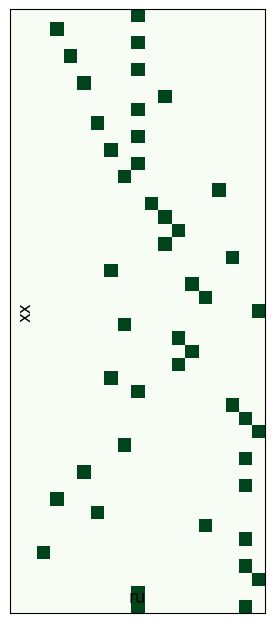

In [ ]:
vis_helper.visualize_alignment_by_db(db_path, output_path="alignment_vis.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(800,800), plt_show=True)

In [ ]:
conflicts_to_solve, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=6, batch_id=-1)

resolver.get_statistics(conflicts_to_solve)
resolver.get_statistics(rest)

conflicts to solve: 2
total conflicts: 4
('5:2', 1)
('5:4', 1)
('4:-1', 1)
('12:1', 1)


conflicts to solve: 2
total conflicts: 4


100%|██████████| 2/2 [00:26<00:00, 13.15s/it]


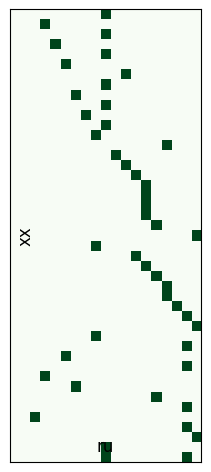

conflicts to solve: 0
total conflicts: 1


0it [00:00, ?it/s]


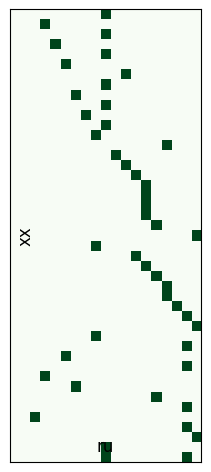

In [ ]:
steps = 2 #3
batch_id = -1 #выровнять все доступные батчи

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2+i, max_conflicts_len=6*(i+1), batch_id=batch_id)
    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)
    vis_helper.visualize_alignment_by_db(db_path, output_path="img_test1.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(600,600), plt_show=True)

    if len(rest) == 0: break

In [ ]:
output_path = "result/triod.html"
paragraphs_from, paragraphs_to, meta = reader.get_paragraphs(db_path)

In [ ]:
print(paragraphs_from)
print(paragraphs_to)

[['Στιχηρὰ Ἀναστάσιμα τῆς Ὀκτωήχου.'], ['Ἦχος β΄.'], ['Τὸν πρὸ αἰώνων ἐκ Πατρὸς γεννηθέντα, τὸν Θεὸν λόγον σαρκωθέντα, ἐκ Παρθένου Μαρίας, δεῦτε προσκυνήσωμεν· Σταυρὸν γὰρ ὑπομείνας, τῇ ταφῇ παρεδόθη, ὡς αὐτός ἠθέλησε, καὶ ἀναστὰς ἐκ νεκρῶν, ἔσωσέ με τὸν πλανώμενον ἄνθρωπον.'], ['Ἦχος β΄.'], ["Χριστὸς ὁ Σωτὴρ ἡμῶν, τὸ καθ' ἡμῶν χειρόγραφον προσηλώσας, τῷ Σταυρῷ ἐξήλειψε, καὶ τοῦ θανάτου τὸ κράτος κατήργησε, προσκυνοῦμεν αὐτοῦ τὴν τριήμερον Ἔγερσιν."], ['Ἦχος β΄.'], ['Σὺν Ἀρχαγγέλοις ὑμνήσωμεν, Χριστοῦ τὴν Ἀνάστασιν· αὐτὸς γὰρ Λυτρωτὴς ἐστι, καὶ Σωτὴρ τῶν ψυχῶν ἡμῶν, καὶ ἐν δόξῃ φοβερᾷ καὶ κραταιᾷ δυνάμει, πάλιν ἔρχεται, κρῖναι κόσμον ὃν ἔπλασεν.'], ['Ἕτερα Στιχηρά, Ἀνατολικά. - Ὀκτώηχος.'], ['Ἦχος β΄.'], ['Σὲ τὸν σταυρωθέντα καὶ ταφέντα, Ἄγγελος ἐκήρυξε Δεσπότην, καὶ ἔλεγε ταῖς γυναιξί· Δεῦτε ἴδετε, ὅπου ἔκειτο ὁ Κύριος· Ἀνέστη γὰρ καθὼς εἶπεν, ὡς παντοδύναμος· διό σε προσκυνοῦμεν τὸν μόνον ἀθάνατον, ζωοδότα Χριστέ, ἐλέησον ἡμᾶς.'], ['Ἦχος β΄.'], ['Ἐν τῷ Σταυρῷ σου κατήργησας, τὴν τοῦ 

In [ ]:
reader.create_book(paragraphs_from, 
                   paragraphs_to, 
                   meta, 
                   output_path, 
                   template="pastel_start")

In [ ]:
from google.colab import files

files.download(output_path) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>